---

Aswin Setiawan

Data Science Intern

---

Level 3
(Advanced)

Task 3: Neural Networks with TensorFlow/Keras

#Import Library

Here we Import the libraries needed to analyze and processing the model

In [1]:
# Import TensorFlow library for deep learning
import tensorflow as tf

# Import Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Import NumPy library for numerical operations
import numpy as np

# Import Keras from TensorFlow
from tensorflow import keras

# Import to_categorical function to convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

# Import Sequential class to create a neural network model sequentially
from tensorflow.keras.models import Sequential

# Import Dense and Dropout classes to create layers in the model
from tensorflow.keras.layers import Dense, Dropout

# Load And Preprocess Data

In [2]:
# Load the MNIST dataset from Keras
mnist = keras.datasets.mnist

# Split the dataset into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# The MNIST dataset contains handwritten digit images and their corresponding labels

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Convert x_train data type to float32 and normalize pixel values to the range 0-1
x_train = x_train.astype('float32')/255.0

# Convert x_test data type to float32 and normalize pixel values to the range 0-1
x_test = x_test.astype('float32')/255.0

# Data normalization helps improve training performance

In [4]:
# Reshape x_train into a vector with length 784 (28x28)
x_train = x_train.reshape(-1, 28 * 28)

# Reshape x_test into a vector with length 784 (28x28)
x_test = x_test.reshape(-1, 28 * 28)

# Images are converted into vectors to match the input layer of the model.

In [5]:
# Convert y_train labels to one-hot encoding with 10 classes
y_train = to_categorical(y_train, num_classes=10)

# Convert y_test labels to one-hot encoding with 10 classes
y_test = to_categorical(y_test, num_classes=10)

# Reshape y_train into a vector with length 10
y_train = y_train.reshape(-1, 10)

# One-hot encoding is used to represent class labels in vector form.

# Define Model

In [6]:
# Define the Sequential model for the feedforward neural network (FFNN)
FFNN = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input Layer: 128 neurons, ReLU activation function, 784 input features
    Dropout(0.2),  # Dropout Layer: 20% dropout for regularization and preventing overfitting
    Dense(64, activation='relu'),  # Hidden Layer: 64 neurons, ReLU activation function
    Dense(10, activation='softmax')  # Output Layer: 10 neurons (for 10 classes), Softmax activation function for multi-class classification
])

# The model consists of an input layer, hidden layers, and an output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile model

In [7]:
# Compile the FFNN model with the specified optimizer, loss function, and metrics.
FFNN.compile(
    optimizer='adam',  # Use the 'adam' optimizer to update model weights during training.
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' as the loss function for multi-class classification.
    metrics=['accuracy']  # Monitor 'accuracy' as a metric to evaluate model performance.
)

# Optimizer, loss function, and metrics are crucial for the training process

# Train model

In [8]:
# Train the FFNN model using training data
model = FFNN.fit(
    x_train, y_train,  # Training data: input (x_train) and labels (y_train)
    validation_split=0.2,  # Split 20% of training data for validation
    epochs=10,  # Number of epochs (training iterations through the entire dataset)
    batch_size=32,  # Batch size (number of samples processed before weight updates)
    verbose=2  # Display training progress (detailed information)
)

# The model is trained using training data and validated using validation data.

Epoch 1/10
1500/1500 - 6s - 4ms/step - accuracy: 0.9055 - loss: 0.3187 - val_accuracy: 0.9572 - val_loss: 0.1408
Epoch 2/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9555 - loss: 0.1500 - val_accuracy: 0.9686 - val_loss: 0.1077
Epoch 3/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9646 - loss: 0.1147 - val_accuracy: 0.9707 - val_loss: 0.0980
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9711 - loss: 0.0949 - val_accuracy: 0.9740 - val_loss: 0.0914
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9741 - loss: 0.0814 - val_accuracy: 0.9756 - val_loss: 0.0834
Epoch 6/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9776 - loss: 0.0699 - val_accuracy: 0.9753 - val_loss: 0.0862
Epoch 7/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9782 - loss: 0.0656 - val_accuracy: 0.9752 - val_loss: 0.0910
Epoch 8/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9811 - loss: 0.0580 - val_accuracy: 0.9746 - val_loss: 0.0935
Epoch 9/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9820 - loss: 0.0541 - val_accuracy: 0.9752 - 

# Evaluate Model

In [9]:
# Evaluate the FFNN model using testing data
test_loss, test_acc = FFNN.evaluate(x_test, y_test, verbose=2)

# Print the testing accuracy
print(f"\nTest Accuracy: {test_acc:.4f}")

# Model performance is evaluated using unseen testing data

313/313 - 1s - 4ms/step - accuracy: 0.9780 - loss: 0.0787

Test Accuracy: 0.9780


# Visualize Training and Validation

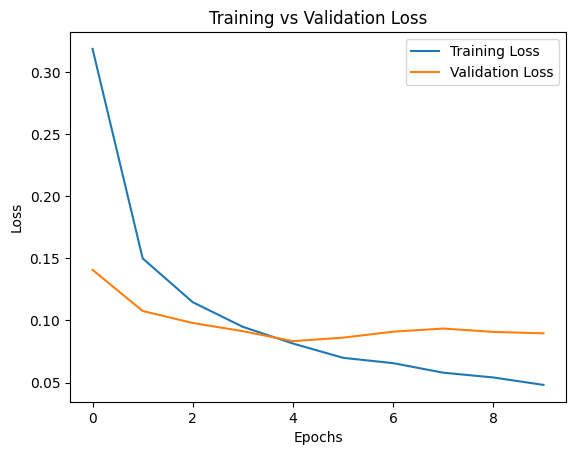

In [10]:
# Visualize training and validation loss
plt.plot(model.history['loss'], label='Training Loss') # Plot training loss values against epochs
plt.plot(model.history['val_loss'], label='Validation Loss') # Plot validation loss values against epochs
plt.xlabel('Epochs') # Label the x-axis as 'Epochs'
plt.ylabel('Loss') # Label the y-axis as 'Loss'
plt.legend() # Display a legend to differentiate between training and validation loss plots
plt.title('Training vs Validation Loss') # Set the title of the plot
plt.show() # Show the plot

# Loss visualization helps in understanding the training process and detecting overfitting